In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
world_data = pd.read_csv('world_population.csv')
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [3]:
world_data.shape

(234, 17)

In [4]:
world_data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
asia = world_data[world_data['Continent'] == 'Asia']
asia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 231
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         50 non-null     int64  
 1   CCA3                         50 non-null     object 
 2   Country                      50 non-null     object 
 3   Capital                      50 non-null     object 
 4   Continent                    50 non-null     object 
 5   2022 Population              50 non-null     int64  
 6   2020 Population              50 non-null     int64  
 7   2015 Population              50 non-null     int64  
 8   2010 Population              50 non-null     int64  
 9   2000 Population              50 non-null     int64  
 10  1990 Population              50 non-null     int64  
 11  1980 Population              50 non-null     int64  
 12  1970 Population              50 non-null     int64  
 13  Area (km²)           

In [6]:
asia.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,77.560000,9.442767e+07,9.326173e+07,8.916500e+07,8.440083e+07,7.470179e+07,6.421127e+07,5.270668e+07,4.289813e+07,6.427628e+05,1025.024136,1.009384,1.183800
std,53.633739,2.797207e+08,2.775374e+08,2.672775e+08,2.548406e+08,2.294235e+08,2.010543e+08,1.676305e+08,1.383442e+08,1.495049e+06,3535.091414,0.009213,3.507563
min,1.000000,4.490020e+05,4.417250e+05,4.214370e+05,3.615750e+05,2.825070e+05,2.249570e+05,1.648870e+05,1.180070e+05,3.000000e+01,2.172700,0.981600,0.010000
25%,30.500000,5.309989e+06,5.180282e+06,4.775965e+06,4.243158e+06,3.469900e+06,3.136804e+06,2.262860e+06,1.683488e+06,3.135550e+04,71.512850,1.004400,0.070000
50%,69.500000,1.808292e+07,1.768805e+07,1.662672e+07,1.549568e+07,1.367755e+07,9.802802e+06,7.641007e+06,6.212695e+06,1.643025e+05,122.965150,1.008100,0.225000
75%,121.250000,4.998589e+07,4.952276e+07,4.768525e+07,4.442600e+07,4.038514e+07,3.527455e+07,2.962441e+07,2.421230e+07,5.068650e+05,336.346625,1.015000,0.627500
max,175.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,9.706961e+06,23172.266700,1.037600,17.880000


In [7]:
asia[['Country', 'CCA3']]

,Country,CCA3
0,Afghanistan,AFG
9,Armenia,ARM
13,Azerbaijan,AZE
15,Bahrain,BHR
16,Bangladesh,BGD
23,Bhutan,BTN
29,Brunei,BRN
33,Cambodia,KHM
41,China,CHN
73,Georgia,GEO


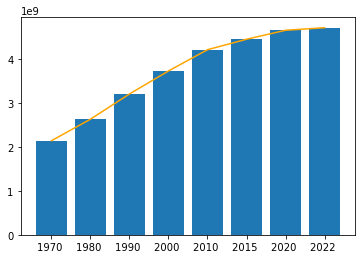

In [8]:
pop_totals = []
pop_columns = asia.columns[5:13].tolist()
pop_columns.reverse()
for column in pop_columns:
    pop_totals.append(asia[column].sum())
#pop_totals
#pop_columns

years = []
for column in pop_columns:
    column.split()
    year = column[0:5]
    years.append(year)

fig, ax = plt.subplots()
ax.bar(years, pop_totals)
ax.plot(years, pop_totals, color = 'orange')

['1970 ', '1980 ', '1990 ', '2000 ', '2010 ', '2015 ', '2020 ', '2022 ']


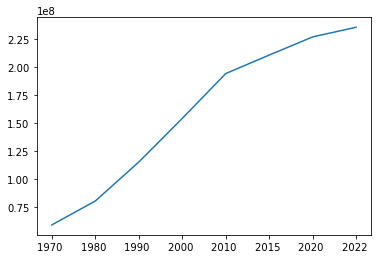

In [9]:
print(years)
pakistan = asia[asia['Country'] == 'Pakistan']
pak = pakistan.values
pop_array = pak[0, 5:13]

pakistan_pop_list = []
for i in range(len(pop_array)):
    pakistan_pop_list.append(pop_array[i])
    
pakistan_pop_list.reverse()

plt.plot(years, pakistan_pop_list)

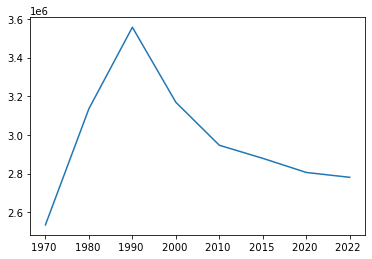

In [11]:
armenia = asia[asia['Country'] == 'Armenia']
armenia
arm = armenia.values
arm_array = arm[0, 5:13]

armenia_pop_list = []
for i in range(len(arm_array)):
    armenia_pop_list.append(arm_array[i])
    
armenia_pop_list.reverse()

plt.plot(years, armenia_pop_list)